In [1]:
#Import data packages
import numpy as np
import pandas as pd

#Import audio packages
import librosa
import librosa.display
from scipy.io import wavfile
import scipy.io.wavfile
import sys

#Import plotting packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt
import seaborn as sns

#Import Keras & Tensorflow packages
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('data/final_data.csv',index_col=0)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-587.907898,36.178154,-17.241106,-9.742208,-27.773447,-14.733717,-11.477688,-15.569857,-14.273412,-8.294398,...,3.212901,-1.833511,-2.232787,-4.604078,0.343586,-1.242408,-0.375359,3.929535,10.683189,sad
1,-509.770386,43.354965,-24.751860,8.810980,-8.211090,-24.347290,-9.572964,-15.536777,-10.063596,4.296363,...,1.836776,-8.388222,-7.970921,-3.082049,3.787357,-0.004449,2.402939,7.500911,7.930544,happy
2,-608.325256,91.134865,-8.422993,24.703096,1.783348,-23.475849,-8.582272,-3.728264,-11.954734,0.899885,...,5.030650,0.232143,2.143103,-1.058072,-1.230369,-0.428278,6.082251,10.974966,18.634037,calm
3,-504.740112,55.126217,-20.908773,13.133360,-6.350088,-7.488061,-18.778595,-4.136145,-18.639141,-2.384829,...,2.723440,2.149348,0.681944,-4.007479,-1.396597,-1.036337,5.015131,10.885223,16.854820,happy
4,-637.394531,43.984432,-17.269554,-3.644861,-15.109137,-18.893116,-2.212192,-20.164730,-10.050422,2.773326,...,15.225397,0.327097,-4.202260,-5.842893,1.823740,-2.011576,3.554226,11.488029,20.341881,calm


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,...,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000
mean,-474.825400,68.959442,-2.465709,7.754233,-2.951021,-2.184473,-7.219981,-10.250189,-10.863119,-2.157528,...,0.156447,4.292126,0.896318,3.231216,2.804025,5.663384,4.260060,6.074749,4.244102,6.567562
std,102.780794,26.872863,18.967938,14.578706,12.879024,9.809817,6.644211,8.395309,7.470199,5.471789,...,5.216273,5.000841,5.173547,6.337883,7.438271,7.869083,8.959394,8.449346,7.514006,6.675726
min,-816.602051,-5.577060,-61.438057,-52.139618,-53.896233,-42.359554,-30.524818,-40.977211,-36.335476,-27.020121,...,-17.605717,-10.091280,-17.813940,-13.397492,-12.835851,-10.042743,-13.340294,-8.731528,-13.509073,-6.379797
25%,-543.404099,49.703791,-16.597983,-1.076724,-11.418915,-8.599307,-11.783132,-16.344710,-16.113452,-5.616022,...,-2.712088,0.795306,-2.196446,-0.341816,-1.531683,1.444723,-0.676261,0.850323,-0.944614,1.511528
50%,-465.668930,67.421211,-4.121547,8.236859,-2.479352,-1.603679,-7.174195,-10.132372,-10.702177,-2.376843,...,-0.120013,3.638372,0.516196,2.632285,1.422286,3.561242,1.765384,3.718091,2.509287,4.616601
75%,-402.947136,88.658934,11.154635,16.075874,5.678781,4.783133,-2.674981,-4.135000,-5.812225,1.193249,...,2.962305,7.220934,3.814691,5.966297,4.881480,6.697918,5.615595,8.962523,8.473020,10.961363
max,-207.591217,151.428589,55.034927,58.653442,30.714607,25.484125,18.340857,13.008193,16.267603,25.757534,...,20.408073,23.204916,26.647358,40.969379,45.493896,48.644695,49.000164,47.316814,45.118980,41.408298


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5252 entries, 0 to 5251
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        5252 non-null   float64
 1   1        5252 non-null   float64
 2   2        5252 non-null   float64
 3   3        5252 non-null   float64
 4   4        5252 non-null   float64
 5   5        5252 non-null   float64
 6   6        5252 non-null   float64
 7   7        5252 non-null   float64
 8   8        5252 non-null   float64
 9   9        5252 non-null   float64
 10  10       5252 non-null   float64
 11  11       5252 non-null   float64
 12  12       5252 non-null   float64
 13  13       5252 non-null   float64
 14  14       5252 non-null   float64
 15  15       5252 non-null   float64
 16  16       5252 non-null   float64
 17  17       5252 non-null   float64
 18  18       5252 non-null   float64
 19  19       5252 non-null   float64
 20  20       5252 non-null   float64
 21  21       5252 

In [6]:
df.groupby(by='emotion').mean()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
emotion,,,,,,,,,,,,,,,,,,,,,
angry,-410.799150,56.020308,-11.680501,3.587286,-11.334070,-3.679859,-6.822299,-11.963237,-11.680809,-2.825743,...,3.971557,6.421421,3.321938,2.741259,1.274008,3.156837,1.646938,4.057796,1.118420,4.109445
calm,-614.347018,60.955618,-4.189873,10.313878,-1.233451,-5.702645,-6.962170,-10.059076,-9.475212,-2.608536,...,0.320176,4.055871,-0.143791,-0.026440,-2.090966,1.160518,-0.106108,3.657369,4.496716,8.175187
disgust,-481.754562,86.364225,4.479180,9.043232,-1.277148,0.141295,-8.085577,-8.313581,-11.660691,-1.588928,...,-0.702263,3.072196,0.344008,3.042546,2.944099,4.171224,4.372669,5.258421,4.407039,5.794349
fear,-435.845302,55.068972,-8.953997,2.879736,-4.836637,-3.411209,-7.338429,-7.750633,-12.017881,-0.193779,...,-1.760516,2.005847,-2.405983,-0.477580,-0.633602,2.693339,-0.514050,2.173728,0.854110,4.828687
happy,-446.725985,63.825775,-9.155361,7.460068,-3.978781,-5.708081,-8.710300,-10.413195,-10.057570,-4.496222,...,2.880291,4.826280,0.832440,2.270148,0.748496,3.858513,1.029531,3.225245,3.243245,6.645898
neutral,-511.088019,81.780445,4.827978,13.157039,3.240210,0.901377,-4.376347,-12.049992,-9.400559,-0.207592,...,-7.276258,-0.043158,-1.752871,7.304097,13.393507,19.914413,20.251503,18.267680,10.576589,8.718031
sad,-525.728004,77.527992,9.791349,16.475393,4.025036,1.759392,-6.257139,-11.864643,-9.613618,-2.576342,...,0.768304,7.158948,3.062159,4.946245,2.273979,4.238575,3.813439,6.812153,6.480056,9.482102
surprised,-448.394724,74.569844,-2.273976,0.278637,-6.201999,-2.323419,-9.017155,-9.221590,-12.508006,-2.460069,...,1.433065,5.715842,3.134413,5.959050,5.155840,7.273011,5.540472,6.841803,4.552856,5.762143


In [7]:
df.groupby(by='emotion').std()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
emotion,,,,,,,,,,,,,,,,,,,,,
angry,70.994293,21.866527,13.256286,14.432274,12.730161,9.874066,7.685482,9.094728,5.895158,4.782160,...,5.641633,5.088546,4.859828,4.247625,4.104332,2.901085,2.560624,3.830304,4.129953,4.706690
calm,73.004379,18.963343,13.390115,9.471320,11.442673,9.327224,6.978898,7.603369,6.742985,4.382583,...,2.863833,3.768940,3.689687,5.289136,4.448549,3.635324,3.233052,4.997935,7.126558,8.104591
disgust,77.537612,26.473823,16.127392,13.826767,13.390837,7.096190,5.247981,9.827039,7.026107,4.151419,...,2.177707,2.453877,2.341843,2.620906,3.379287,3.543098,4.758741,4.841911,5.393151,4.939154
fear,98.426704,21.053610,16.715002,13.736680,9.830010,9.251765,7.202802,8.039947,6.785689,6.966322,...,3.805474,3.484020,4.451824,4.184789,3.500021,2.681457,3.504595,3.483380,5.467923,5.093662
happy,92.191160,28.300197,21.628772,14.800916,9.860455,9.613521,5.228105,8.315175,8.783816,4.861472,...,4.084316,3.596745,3.612386,4.593628,3.954326,3.707527,4.528237,5.753636,6.387890,6.255327
neutral,88.927040,23.141954,16.815506,13.622013,10.624927,9.263153,5.715454,7.219704,7.171489,5.816762,...,4.357764,4.908630,8.259440,12.093898,13.893697,14.137232,15.503032,15.516340,12.974098,9.894131
sad,92.640831,25.377412,21.018782,13.506011,12.781295,11.975219,7.077338,5.930091,8.811192,5.427204,...,4.180060,5.613066,4.079376,5.362587,4.806783,3.762964,4.993310,6.100652,6.037844,6.729897
surprised,92.956208,26.623658,15.046003,12.810177,14.235078,7.104323,6.155630,9.359796,6.733837,4.728430,...,3.988564,5.370410,4.339855,4.561013,5.481171,5.206704,6.312490,6.239759,5.865280,5.321584


In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
X

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-587.907898,36.178154,-17.241106,-9.742208,-27.773447,-14.733717,-11.477688,-15.569857,-14.273412,-8.294398,...,-2.337345,3.212901,-1.833511,-2.232787,-4.604078,0.343586,-1.242408,-0.375359,3.929535,10.683189
1,-509.770386,43.354965,-24.751860,8.810980,-8.211090,-24.347290,-9.572964,-15.536777,-10.063596,4.296363,...,1.311170,1.836776,-8.388222,-7.970921,-3.082049,3.787357,-0.004449,2.402939,7.500911,7.930544
2,-608.325256,91.134865,-8.422993,24.703096,1.783348,-23.475849,-8.582272,-3.728264,-11.954734,0.899885,...,0.012662,5.030650,0.232143,2.143103,-1.058072,-1.230369,-0.428278,6.082251,10.974966,18.634037
3,-504.740112,55.126217,-20.908773,13.133360,-6.350088,-7.488061,-18.778595,-4.136145,-18.639141,-2.384829,...,0.796294,2.723440,2.149348,0.681944,-4.007479,-1.396597,-1.036337,5.015131,10.885223,16.854820
4,-637.394531,43.984432,-17.269554,-3.644861,-15.109137,-18.893116,-2.212192,-20.164730,-10.050422,2.773326,...,1.124650,15.225397,0.327097,-4.202260,-5.842893,1.823740,-2.011576,3.554226,11.488029,20.341881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5247,-433.188965,57.363720,4.908972,13.024331,-3.378766,-0.960908,-15.769565,4.778440,-14.686361,-8.497721,...,1.629190,6.618638,6.445676,-1.611167,-1.723101,1.382978,4.430180,5.747354,-2.161623,3.657368
5248,-559.998840,101.993713,33.605961,12.951871,21.204279,13.413920,4.372688,-7.319698,-9.703876,1.709915,...,5.289425,16.355019,8.957122,11.558165,4.750055,4.040524,2.418961,6.325723,7.394610,15.063540
5249,-496.139191,133.011856,45.438461,0.555025,10.132165,11.738538,-6.431499,7.704493,-19.552839,-16.369890,...,-1.042813,0.150162,3.208148,6.247221,12.822376,13.872787,10.784860,12.104943,9.085450,10.249683
5250,-353.824036,98.714981,-1.281175,8.937387,-3.878722,-3.579316,-3.132740,-20.462267,-5.338827,8.199279,...,-12.223659,-2.974227,-11.691386,-2.699654,3.988725,22.577427,33.460434,37.656155,27.965282,13.931880


In [10]:
y

0           sad
1         happy
2          calm
3         happy
4          calm
         ...   
5247      angry
5248        sad
5249    disgust
5250    neutral
5251       fear
Name: emotion, Length: 5252, dtype: object

In [11]:
X.shape

(5252, 40)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly_conv = PolynomialFeatures(degree=2,include_bias=False)

In [14]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [15]:
poly_features = poly_conv.transform(X)

In [16]:
poly_features.shape

(5252, 860)

# Dividing the data into test and train

In [17]:
from sklearn.model_selection import train_test_split

#Split train & test dataset
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=1)

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (4201, 860)
y_train shape: (4201,)
X_test shape: (1051, 860)
y_test shape: (1051,)


In [18]:
#Check unique values for y_test
y_test.unique()

array(['calm', 'fear', 'angry', 'neutral', 'disgust', 'sad', 'happy',
       'surprised'], dtype=object)

In [19]:
#Check unique values for y_train
y_train.unique()

array(['angry', 'happy', 'fear', 'calm', 'sad', 'surprised', 'neutral',
       'disgust'], dtype=object)

In [20]:
labels = {'neutral':0, 'calm':1, 'happy':2, 'sad':3, 'angry':4, 'fear':5, 'disgust':6, 'surprised':7}

y_train_lb = y_train.map(labels)
y_test_lb = y_test.map(labels)

In [21]:
#Label Encoding
from keras.utils import np_utils

#Encode emotion labels into numbers
y_train_lb = np_utils.to_categorical(y_train_lb)
y_test_lb = np_utils.to_categorical(y_test_lb)

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train_lb.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test_lb.shape}')

X_train shape: (4201, 860)
y_train shape: (4201, 8)
X_test shape: (1051, 860)
y_test shape: (1051, 8)


In [22]:
#Check encoding
np.unique(y_train_lb, axis=0)

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
# range of x values
print(f'X range: {X_train.min()}-{X_train.max()}')
# y unique values
print(f'y values: {np.unique(y_train_lb)}')
num_classes = len(np.unique(y_train_lb))
print(f'Number of classes: {num_classes}')

X range: -73771.23108246738-644473.708759103
y values: [0. 1.]
Number of classes: 2


## Build list of labels to build confusion matrix after model

In [24]:
#Check encoding labels
labels

{'neutral': 0,
 'calm': 1,
 'happy': 2,
 'sad': 3,
 'angry': 4,
 'fear': 5,
 'disgust': 6,
 'surprised': 7}

In [25]:
#Build new lists of encoding labels
y_labels_encoded = {}
for i, label in enumerate(labels):
    y_labels_encoded[i] = label
    
y_labels_encoded

{0: 'neutral',
 1: 'calm',
 2: 'happy',
 3: 'sad',
 4: 'angry',
 5: 'fear',
 6: 'disgust',
 7: 'surprised'}

# Scale data for analysis

In [26]:
from sklearn.preprocessing import StandardScaler
#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [27]:
import pickle
with open('meta/polyscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Build Model - Random Forest

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
#fitting the DT
DT_model_one = DecisionTreeClassifier()
DT_model_one.fit(X_train, y_train_lb)

#Getting the score
print(f"The training classification accuracy is: {DT_model_one.score(X_train, y_train_lb)}")
print(f"The validation classification accuracy is: {DT_model_one.score(X_test, y_test_lb)}")

The training classification accuracy is: 1.0
The validation classification accuracy is: 0.6945765937202664


# Build model - Convolution Neural Network

### Change dimensions for CNN model

In [30]:
#Add dimension for CNN
x_traincnn = np.expand_dims(X_train_scalled, axis=2)
x_testcnn = np.expand_dims(X_test_scalled, axis=2)

#Check shapes of dataframes
print(x_traincnn.shape)
print(x_testcnn.shape)

(4201, 860, 1)
(1051, 860, 1)


In [31]:
#Import packages for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D 
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization, Flatten, MaxPooling1D

In [47]:
#Build sequential CNN
CNN_model = Sequential()

In [48]:
#Build first layer
CNN_model.add(Conv1D(16, 5,padding='same', input_shape=(860, 1), activation='relu'))
CNN_model.add(MaxPooling1D(pool_size=(4)))

In [49]:
#Build second layer
CNN_model.add(Conv1D(32, 5,padding='same',activation='relu'))
#CNN_model.add(MaxPooling1D(pool_size=(4)))

In [50]:
#Build third layer
CNN_model.add(Conv1D(64, 5,padding='same',activation='relu'))
CNN_model.add(MaxPooling1D(pool_size=(4)))

In [51]:
#Build forth layer
CNN_model.add(Conv1D(128, 5,padding='same',activation='relu'))


In [52]:
#Add dropout
CNN_model.add(Dropout(0.1))

#Flatten 
CNN_model.add(Flatten())

In [53]:
CNN_model.add(Dense(128, activation ='relu'))
CNN_model.add(Dropout(0.1))
CNN_model.add(Dense(64, activation ='relu'))
CNN_model.add(Dense(8, activation='softmax'))

In [54]:
#Look at CNN model summary
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 860, 16)           96        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 215, 16)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 215, 32)           2592      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 215, 64)           10304     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 53, 64)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 53, 128)           41088     
_________________________________________________________________
dropout_2 (Dropout)          (None, 53, 128)          

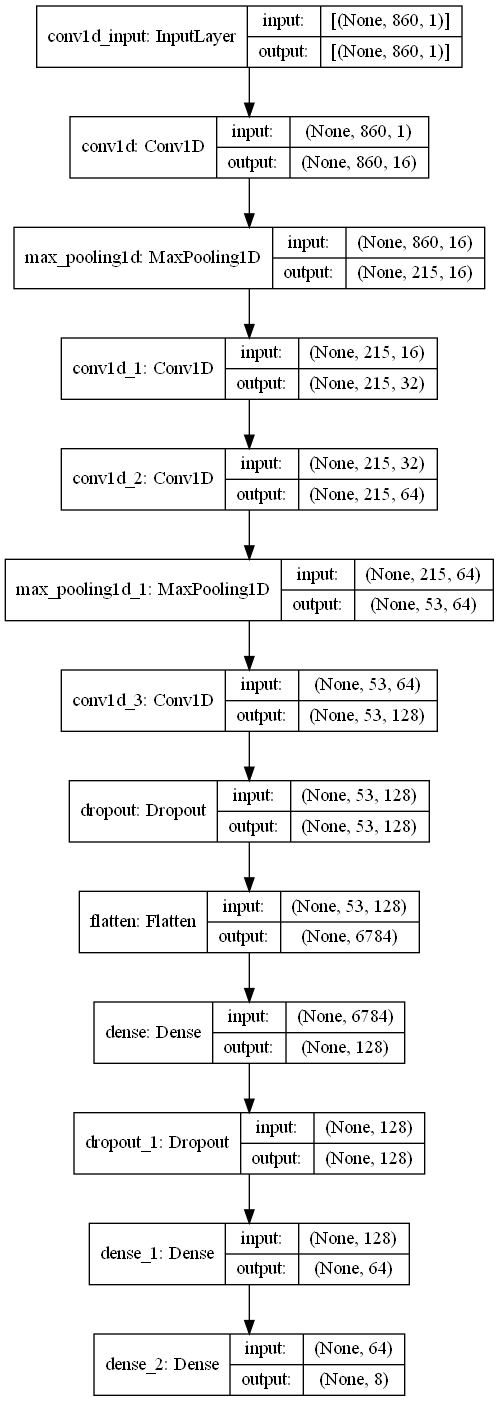

In [41]:
from tensorflow.keras.utils import plot_model

# Save an image of the model's architecture to a file
plot_model(CNN_model, to_file='images/poly_Feed Forward NN.png', show_shapes=True, show_layer_names=True)

In [58]:
from tensorflow.keras.optimizers import RMSprop

In [59]:
# Compile the model with the desired loss function, optimizer, and metric to optimize
CNN_model.compile(loss = 'categorical_crossentropy',
                  optimizer = RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07, decay=0.0),
                  metrics = ['accuracy'])

In [60]:
from keras.callbacks import ModelCheckpoint 

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)

#Model fit
cnn_results = CNN_model.fit(x_traincnn, y_train_lb,
            batch_size = 64,
            epochs = 100,
            verbose = 1,
            validation_data = (x_testcnn, y_test_lb))

Epoch 1/100
66/66 [==============================] - 1s 10ms/step - loss: 1.8329 - accuracy: 0.3666 - val_loss: 1.5933 - val_accuracy: 0.4462
Epoch 2/100
66/66 [==============================] - 0s 7ms/step - loss: 1.4427 - accuracy: 0.5139 - val_loss: 1.3264 - val_accuracy: 0.5852
Epoch 3/100
66/66 [==============================] - 0s 7ms/step - loss: 1.2320 - accuracy: 0.5808 - val_loss: 1.2251 - val_accuracy: 0.5538
Epoch 4/100
66/66 [==============================] - 0s 7ms/step - loss: 1.1132 - accuracy: 0.6082 - val_loss: 1.0964 - val_accuracy: 0.6137
Epoch 5/100
66/66 [==============================] - 0s 7ms/step - loss: 1.0395 - accuracy: 0.6289 - val_loss: 1.0313 - val_accuracy: 0.6375
Epoch 6/100
66/66 [==============================] - 0s 7ms/step - loss: 0.9769 - accuracy: 0.6584 - val_loss: 0.9879 - val_accuracy: 0.6508
Epoch 7/100
66/66 [==============================] - 0s 7ms/step - loss: 0.9283 - accuracy: 0.6632 - val_loss: 0.9143 - val_accuracy: 0.6717
Epoch 8/100


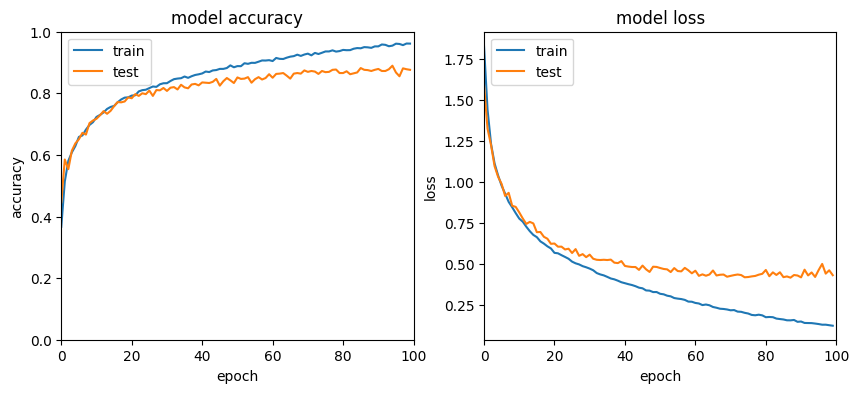

In [61]:
#Plot model accuracy over ephocs
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(cnn_results.history['accuracy'])
ax[0].plot(cnn_results.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].set_xlim(0,100)
ax[0].set_ylim(0,1)
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(cnn_results.history['loss'])
ax[1].plot(cnn_results.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].set_xlim(0,100)
ax[1].legend(['train', 'test'], loc='upper left')
plt.savefig('images/poly_model_acc.png',dpi=200)
plt.show()

In [62]:
# Calculate pre-training accuracy 
score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

33/33 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8763
Pre-training accuracy: 87.6308%


In [63]:
# Evaluating the model on the training and testing set
score = CNN_model.evaluate(x_traincnn, y_train_lb, verbose=0)
print("Training Accuracy: ", round(score[1]*100,2))

score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=0)
print("Testing Accuracy: ", round(score[1]*100,2))

Training Accuracy:  98.1
Testing Accuracy:  87.63


# Add Confusion Matrix

In [64]:
#Get predictions from model
y_test_predictions = np.argmax(CNN_model.predict(x_testcnn), axis=-1)
y_test_predictions

array([1, 5, 4, ..., 5, 7, 3], dtype=int64)

In [65]:
y_test

4            calm
3251         fear
440         angry
1413      neutral
4353      disgust
          ...    
2907        angry
759          calm
1042         fear
3570    surprised
3376          sad
Name: emotion, Length: 1051, dtype: object

In [66]:
#Get labels for emotions
y_labels_encoded

{0: 'neutral',
 1: 'calm',
 2: 'happy',
 3: 'sad',
 4: 'angry',
 5: 'fear',
 6: 'disgust',
 7: 'surprised'}

In [67]:
# Change predictions to emotions in order to compare
y_test_predictions_labels =[]

#Go through each prediction and append to new list
for e in range(len(y_test_predictions)):
    y_test_predictions_labels.append(y_labels_encoded[y_test_predictions[e]])
    
#Build array of predictions
y_test_predictions_labels = np.array(y_test_predictions_labels)
y_test_predictions_labels

array(['calm', 'fear', 'angry', ..., 'fear', 'surprised', 'sad'],
      dtype='<U9')

In [68]:
from sklearn.metrics import confusion_matrix

#Build confusion matrix and see results
confusion_matrix = confusion_matrix(y_test, y_test_predictions_labels)
confusion_matrix

array([[158,   0,   2,   0,   1,   0,   1,   4],
       [  0,  70,   0,   0,   1,   4,   3,   0],
       [  1,   2, 104,   1,   0,   0,   0,   7],
       [  6,   1,   1, 133,   9,   1,  10,   4],
       [  7,   4,   0,   4, 118,   1,   2,   5],
       [  0,   7,   0,   1,   0, 106,   3,   0],
       [  1,   5,   0,   3,   6,   5, 125,   5],
       [  1,   1,   4,   1,   3,   1,   1, 107]], dtype=int64)

In [69]:
#See confusion matrix shape
confusion_matrix.shape

(8, 8)

In [70]:
#Turn all correct answers into 0 to visualize errors better
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        if i == j:
            confusion_matrix[i,j] = 0

# See results
confusion_matrix

array([[ 0,  0,  2,  0,  1,  0,  1,  4],
       [ 0,  0,  0,  0,  1,  4,  3,  0],
       [ 1,  2,  0,  1,  0,  0,  0,  7],
       [ 6,  1,  1,  0,  9,  1, 10,  4],
       [ 7,  4,  0,  4,  0,  1,  2,  5],
       [ 0,  7,  0,  1,  0,  0,  3,  0],
       [ 1,  5,  0,  3,  6,  5,  0,  5],
       [ 1,  1,  4,  1,  3,  1,  1,  0]], dtype=int64)

In [71]:
#Add labels to confusion matrix
confusion_matrix = pd.DataFrame(confusion_matrix, columns=list(y_labels_encoded.values()), index=list(y_labels_encoded.values()))

print("The rows represents the true values or observations")
print("The columns respresent the model's predictions")

#Print confusion matrix results
confusion_matrix

The rows represents the true values or observations
The columns respresent the model's predictions


,neutral,calm,happy,sad,angry,fear,disgust,surprised
neutral,0,0,2,0,1,0,1,4
calm,0,0,0,0,1,4,3,0
happy,1,2,0,1,0,0,0,7
sad,6,1,1,0,9,1,10,4
angry,7,4,0,4,0,1,2,5
fear,0,7,0,1,0,0,3,0
disgust,1,5,0,3,6,5,0,5
surprised,1,1,4,1,3,1,1,0


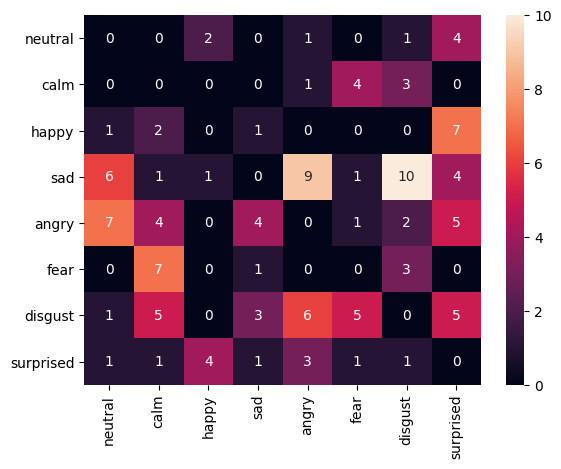

In [72]:
#Plot confusion matrix with results
ax = sns.heatmap(confusion_matrix, annot=True)
plt.savefig('poly_confusion_matrix.png',dpi=200)

# Save CNN Model

In [235]:
from keras.models import model_from_json
# serialize model to json
json_model = CNN_model.to_json()
#save the model architecture to JSON file
with open('models/poly_new_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
CNN_model.save_weights('models/poly_new_model.h5')
#Model loss and accuracy
print("Saved model to disk")

Saved model to disk


# Using whole df

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
round(accuracy_score(y_test,y_test_predictions_labels) * 100,2)

87.63

In [75]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)

#Model fit
cnn_results = CNN_model.fit(x_testcnn, y_test_lb,
            batch_size = 64,
            epochs = 100,
            verbose = 1
                )

Epoch 1/100
17/17 [==============================] - 0s 26ms/step - loss: 0.4909 - accuracy: 0.8601
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3811 - accuracy: 0.8811
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3554 - accuracy: 0.8887
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.3192 - accuracy: 0.8982
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3028 - accuracy: 0.8811
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2656 - accuracy: 0.9106
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2795 - accuracy: 0.9068
Epoch 8/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2496 - accuracy: 0.9068
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2373 - accuracy: 0.9201
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2268 - accuracy: 0.9125
Epoch 11

In [240]:
json_model = CNN_model.to_json()
#save the model architecture to JSON file
with open('models/poly_full_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
CNN_model.save_weights('models/poly_full_model.h5')
#Model loss and accuracy
print("Saved model to disk")

Saved model to disk
